In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../../data/cleanData/oneEncodedDiscord.csv')
df.head()

,Unnamed: 0,major_department,year,music_genre,living,humour,friend_qualities,personal_qualities,sports,friday_night,school_balance,entertainment_genre
0,0,1,4,9,0,3,19,30,1,2,0,2
1,1,2,4,6,0,0,17,25,0,0,0,1
2,2,1,4,6,0,3,1,7,0,1,1,7
3,3,1,4,3,0,1,12,20,0,2,1,5
4,4,1,4,1,0,1,22,10,1,3,1,1


In [118]:
'''
Combinations:
'''

# factors that matter the most
dfi = df[['music_genre','humour','friend_qualities', 'personal_qualities']]
#factors that matter the most
dfi = df[['humour','friend_qualities', 'personal_qualities']]

#what you want in the other person
dfii = df[['friend_qualities','music_genre', 'entertainment_genre','humour']]
#what you want in the other person part 2
dfiii = df[['friend_qualities','music_genre', 'entertainment_genre']]

# likes dislikes
dfiv = df[['music_genre', 'entertainment_genre']]
# entertainment ig, is sports really important way of life or just an underlying quality or entertainment
dfv = df[['music_genre', 'entertainment_genre','sports']]

# time spent; prob useless living data is useless
dfvi = df[['friday_night', 'school_balance', 'living']]

sprinkle of vis

Source: https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8

In [219]:
colors = ['red','blue','green','cyan','magenta','yellow','black']
numToColor = {}
for i in range(len(colors)):
    numToColor[i] = colors[i]

def vis3d(xl,yl,zl,use_colors, w1):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')

    xs = list(df[xl])
    ys = list(df[yl])
    zs = list(df[zl])
    data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
    title = title = "{} {} {}".format(xl,yl,zl)
    colors = []
    if use_colors:
        colors = [numToColor[num] for num in list(df[w1])]
        title = "{} {} {} {}".format(xl,yl,zl,w1)
        for data, color in zip(data_points, colors):
            x, y, z = data
            ax.scatter3D(x, y, z, color=color)
    else:
        for data in data_points:
            x, y, z = data
            ax.scatter3D(x, y, z)
        
    
    plt.title(title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_zlabel(zl)
    plt.show()

def vis2d(xl,yl):
    xs = list(df[xl])
    ys = list(df[yl])
    
    title = "{} {}".format(xl,yl)
    
    plt.title(title)
    plt.scatter(xs,ys)
    plt.show()

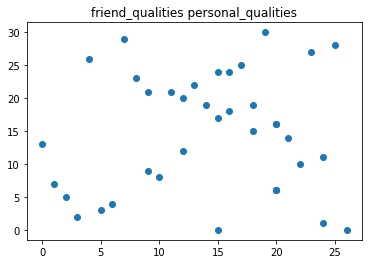

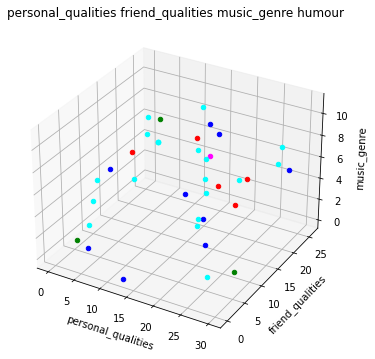

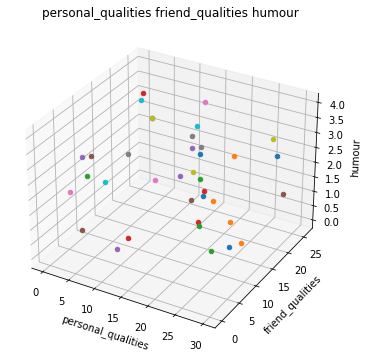

In [220]:
# personal qualities, friend qualities
vis2d('friend_qualities','personal_qualities')
#dfi personal qualities, friend qualities, music_genre, humor
vis3d('personal_qualities', 'friend_qualities', 'music_genre', True, 'humour')
# personal, humor, friend qualities
vis3d('personal_qualities','friend_qualities','humour', False, None)

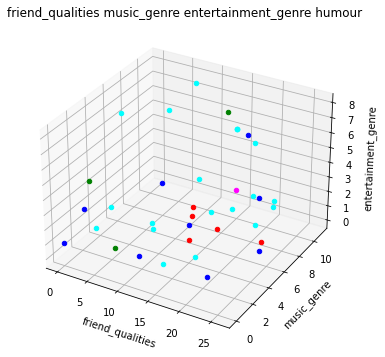

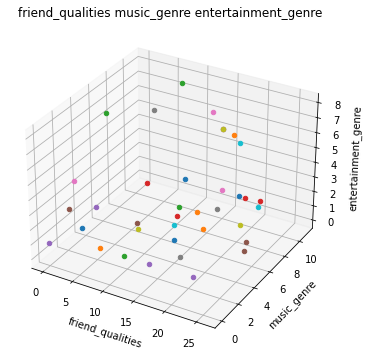

In [97]:
# what you want in others
# dfii = df[['friend_qualities','music_genre', 'entertainment_genre','humour']]
vis3d('friend_qualities','music_genre', 'entertainment_genre',True, 'humour')
# dfiii = df[['friend_qualities','music_genre', 'entertainment_genre']]
vis3d('friend_qualities','music_genre', 'entertainment_genre',False,None)

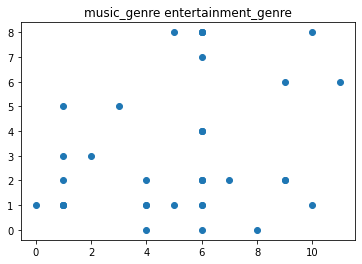

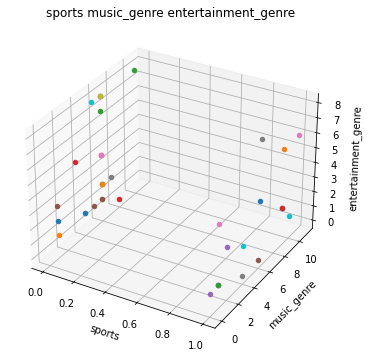

In [101]:
# likes dislikes
#dfiv = df[['music_genre', 'entertainment_genre']]
# entertainment ig, is sports really important way of life or just an underlying quality or entertainment
vis2d('music_genre','entertainment_genre')

#dfv = df[['music_genre', 'entertainment_genre','sports']]
vis3d('sports','music_genre','entertainment_genre',False,None)

Approach:
For each algorithm cluster 
    * vary #of clusters different - use for loop
    * judge each cluster based on silhouette coefficient if cannot visualize
    * for each cluster evaluate the people in it

In [125]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

In [126]:
# prob messy
def ig(X,cluster_num):
    descript = []
    wcss = []
    
    num_clusters = range(2,cluster_num)
    
    for k_clusters in num_clusters:
        cl = KMeans(n_clusters = k_clusters, init = 'k-means++', random_state = 1)
        cl_labels = cl.fit_predict(X)
        wcss.append(cl.inertia_)
        silhouette_avg = round(silhouette_score(X, cl_labels),4)
        
        
        desc = {'cluster':k_clusters,'silhouette score': silhouette_avg}
        descript.append(desc)
    
    plt.plot(range(2, cluster_num), wcss)
    plt.title('Elbow')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return descript

def ig(X,cluster_num):
    descript = []
    wcss = []
    
    num_clusters = range(2,cluster_num)
    
    for k_clusters in num_clusters:
        cl = KMeans(n_clusters = k_clusters, init = 'k-means++', random_state = 1)
        cl_labels = cl.fit_predict(X)
        wcss.append(cl.inertia_)
        silhouette_avg = round(silhouette_score(X, cl_labels),4)
        
        
        desc = {'cluster':k_clusters,'silhouette score': silhouette_avg}
        descript.append(desc)
    
    plt.plot(range(2, cluster_num), wcss)
    plt.title('Elbow')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return descript
#         elif model == 'gm':
#             cl = GaussianMixture(n_components=2, random_state=0).fit(X)
        
#         elif model == 'hac':
#             cl = clustering = AgglomerativeClustering().fit(X)

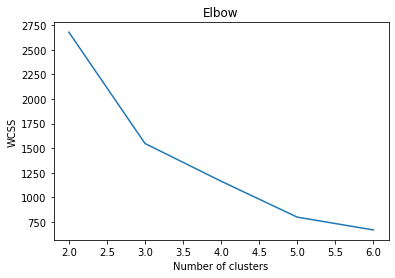

[{'cluster': 2, 'silhouette score': 0.4127}, {'cluster': 3, 'silhouette score': 0.4664}, {'cluster': 4, 'silhouette score': 0.3858}, {'cluster': 5, 'silhouette score': 0.4277}, {'cluster': 6, 'silhouette score': 0.3964}]


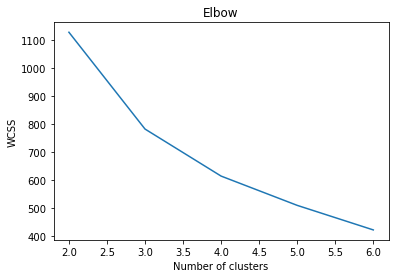

[{'cluster': 2, 'silhouette score': 0.4486}, {'cluster': 3, 'silhouette score': 0.3554}, {'cluster': 4, 'silhouette score': 0.373}, {'cluster': 5, 'silhouette score': 0.3368}, {'cluster': 6, 'silhouette score': 0.3368}]


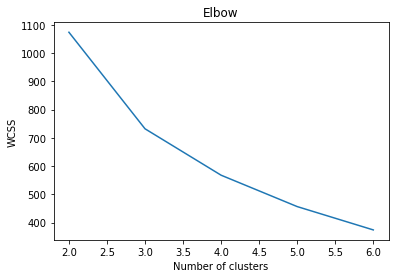

[{'cluster': 2, 'silhouette score': 0.4613}, {'cluster': 3, 'silhouette score': 0.3716}, {'cluster': 4, 'silhouette score': 0.39}, {'cluster': 5, 'silhouette score': 0.3807}, {'cluster': 6, 'silhouette score': 0.3694}]


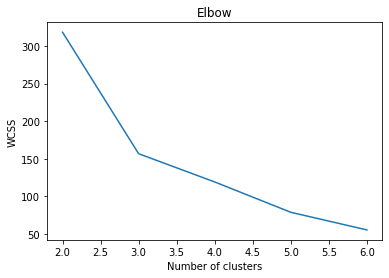

[{'cluster': 2, 'silhouette score': 0.3933}, {'cluster': 3, 'silhouette score': 0.5144}, {'cluster': 4, 'silhouette score': 0.4882}, {'cluster': 5, 'silhouette score': 0.5341}, {'cluster': 6, 'silhouette score': 0.56}]


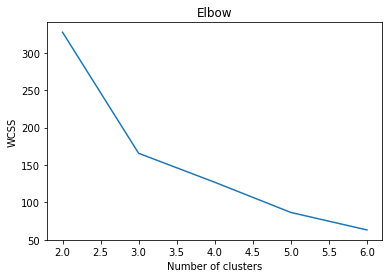

[{'cluster': 2, 'silhouette score': 0.3825}, {'cluster': 3, 'silhouette score': 0.4944}, {'cluster': 4, 'silhouette score': 0.4665}, {'cluster': 5, 'silhouette score': 0.5063}, {'cluster': 6, 'silhouette score': 0.5177}]


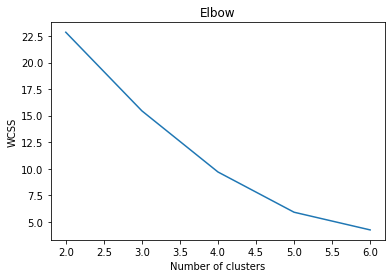

[{'cluster': 2, 'silhouette score': 0.4967}, {'cluster': 3, 'silhouette score': 0.5277}, {'cluster': 4, 'silhouette score': 0.5996}, {'cluster': 5, 'silhouette score': 0.7422}, {'cluster': 6, 'silhouette score': 0.7852}]


In [127]:
'''Kmeans fiesta'''
Xi = dfi.values
res_i = ig(Xi,7)
print(res_i)

# k=3 does the best regardless of init and random_state

Xii = dfii.values
res_ii = ig(Xii,7)
print(res_ii)
# k = 2

Xiii = dfiii.values
res_iii = ig(Xiii,7)
print(res_iii)
# k = 3 based on silhouette score and elbow; seems to be overfitting eventually 0.51

Xiv = dfiv.values
res_iv = ig(Xiv,7)
print(res_iv)
# k = 3 based on silhouette score and elbow; seems to be overfitting eventually

Xv = dfv.values
res_v = ig(Xv,7)
print(res_v)
# k = 3? questionable; no elbow, only overfitting

Xvi = dfvi.values
res_vi = ig(Xvi,7)
print(res_vi)
# worst one yet no elbow

In [210]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
def gmm_n_comp(X, covar_type):
    n_components = np.arange(1, 21)
    models = [GaussianMixture(n, covariance_type=covar_type, random_state=0).fit(X) for n in n_components]

    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.show()
    
def allgm(X):
    for covar_type in covariance_types:
        gmm_n_comp(X,covar_type)
        
def gmm(X, n_components, co_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=co_type, random_state=0)
    gmm_labels = gmm.fit_predict(X)
    return (silhouette_score(X, gmm_labels))
        

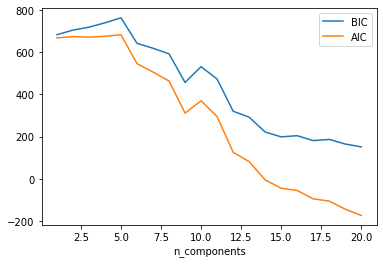

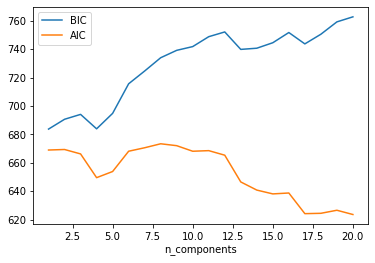

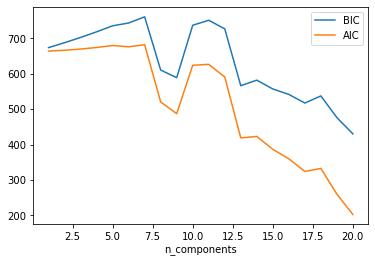

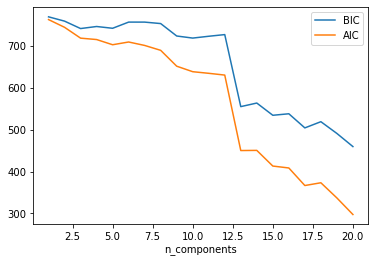

0.4127799229317071


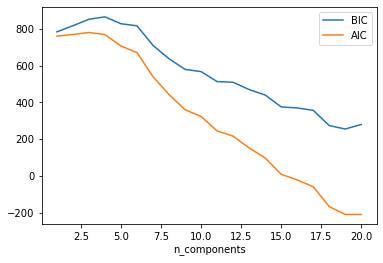

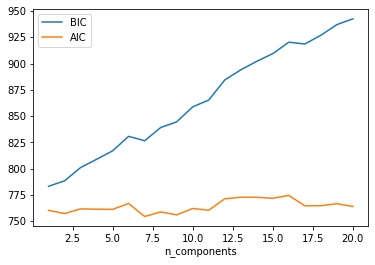

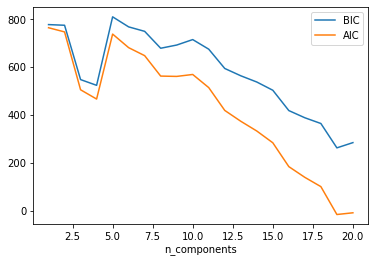

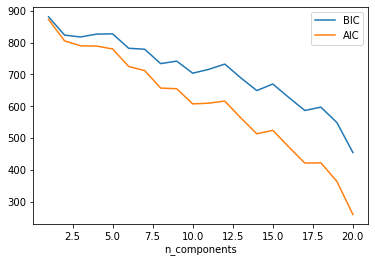

0.24661090419056436


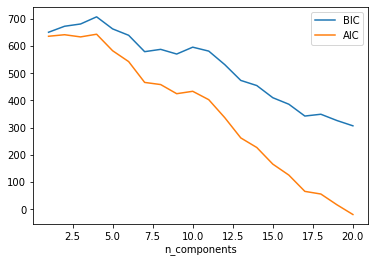

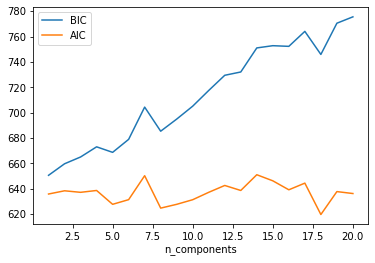

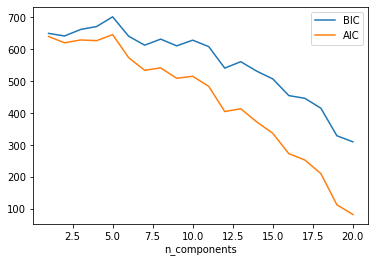

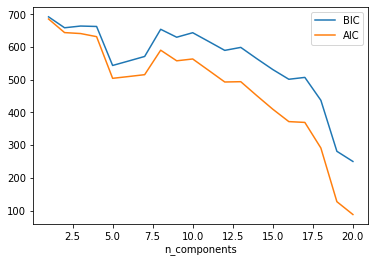

0.30596307868906214


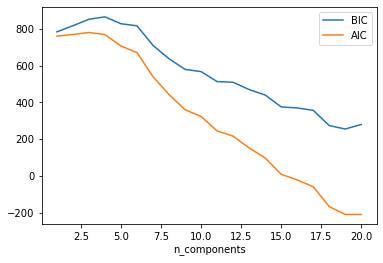

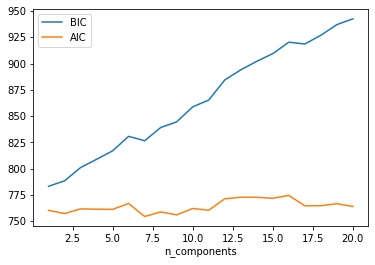

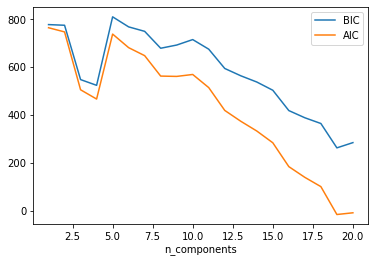

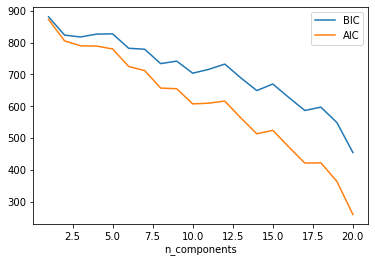

0.5103679906673481


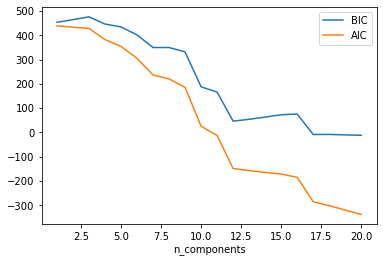

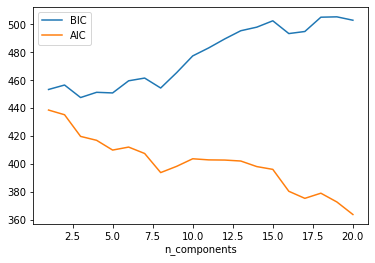

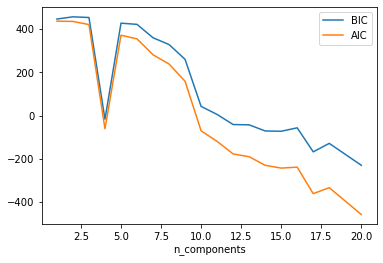

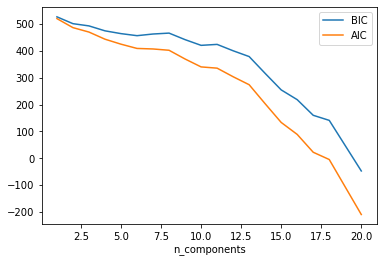

0.4937090941502064


/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  random_state=r

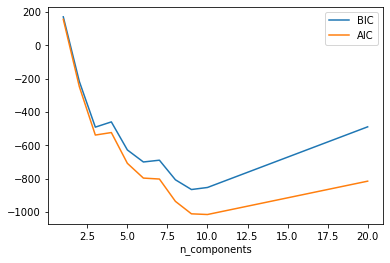

/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  random_state=r

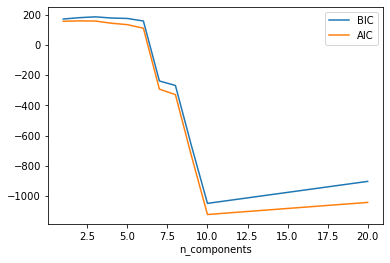

/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  random_state=r

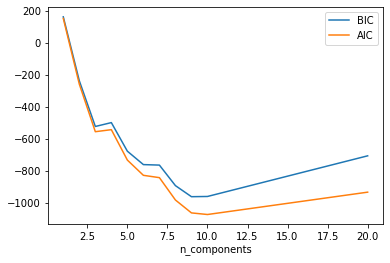

/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/opt/anaconda2/envs/cs185c/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  random_state=r

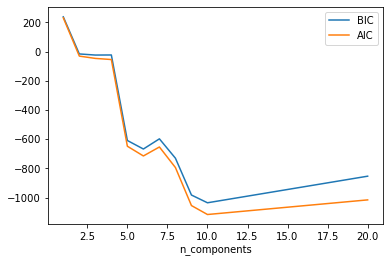

0.9210526315789473


In [221]:
'''gmm carnival'''
# evaluated using aic bic graphs and silhouette coeffs
Xi = dfi.values
res_i = allgm(Xi)
#apparently aic, bic doesnt matter rip; only for density; 10 looks good?

Xi = dfi.values
res = gmm(Xi, 10,'full')
print(res)
#0.41

Xii = dfii.values
res_ii = allgm(Xii)

Xii = dfii.values
res = gmm(Xii, 5, 'full')
print(res)
#0.29 ish

Xiii = dfiii.values
res_iii = allgm(Xiii)

Xiii = dfiii.values
res = gmm(Xiii, 4, 'full')
print(res)
#0.2 and p bad iterations

Xiv = dfiv.values
res_ii = allgm(Xii)

Xiv = dfiv.values
res = gmm(Xiv, 5, 'diag')
print(res)
#0.519 5 full
#0.510 5 diag

Xv = dfv.values
res_v = allgm(Xv)

Xv = dfv.values
res = gmm(Xv, 5, 'full')
print(res)
#.493 5 full; 4 full 0.47
# 5 diag 0.489

Xvi = dfvi.values
res_vi = allgm(Xvi)

Xvi = dfvi.values
res = gmm(Xvi, 10, 'full')
print(res)
#0.74; overfitting?
#0.92 10 full 

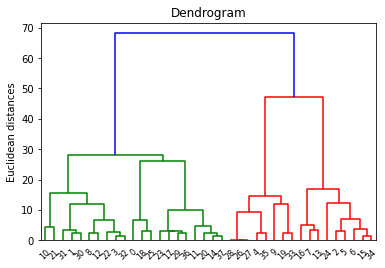

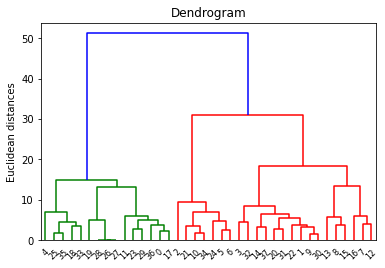

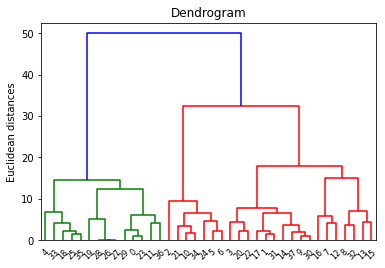

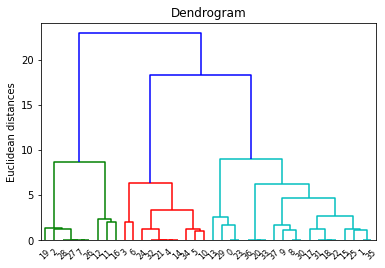

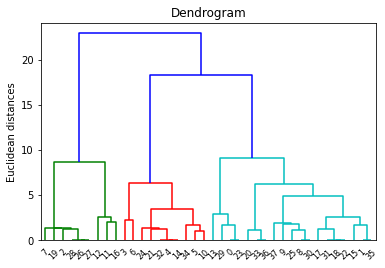

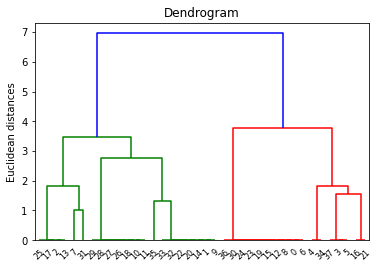

In [208]:
# last one
# dendo dendo dendo
import scipy.cluster.hierarchy as sch

variations = [Xi, Xii, Xiii, Xiv, Xv, Xvi]
for X in variations:
    dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.show()

'''
i 3
ii 3?
iii 3 or 5?
iv 3
v 3
vi ?? doesnt seem right
'''

In [218]:
# def vis3dclus(xl,yl,zl):
#     fig = plt.figure(figsize=(8, 6))
#     ax = plt.axes(projection='3d')

#     xs = list(x1)
#     ys = list(yl)
#     zs = list(zl)
#     data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
#     title = title = "{} {} {}".format(xl,yl,zl)
#     colors = []
#     colors = [numToColor[num] for num in list(df[w1])]
#     title = "{} {} {} {}".format(xl,yl,zl,w1)
#     for data, color in zip(data_points, colors):
#         x, y, z = data
#         ax.scatter3D(x, y, z, color=color)

        
    
#     plt.title(title)
#     ax.set_xlabel(xl)
#     ax.set_ylabel(yl)
#     ax.set_zlabel(zl)
#     plt.show()
    
def hacForNumClusters(n):
    for i, X in enumerate(variations):
        hc = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage ='ward')
        labels = hc.fit_predict(X)
        print(str(i),str(silhouette_score(X, labels)))
        
#         vis3dclus(X[labels==0,0], X[labels==0,1], X[labels==0,2])

print('5 clusters')
hacForNumClusters(5)
print('3 clusters')
hacForNumClusters(3)

#third df seems optimal

'''
5 clusters
0 0.42822968532379496
1 0.323303906685102
2 0.3336205049864908
3 0.5340773635422688
4 0.5062710688427855
5 0.7421754682947016
3 clusters
0 0.4722641744914377
1 0.3522829521499808
2 0.3591236865747282
3 0.5144286414232155
4 0.49444532295512944
5 0.5313596323492537
'''

5 clusters
3 clusters
0 0.4722641744914377
1 0.3522829521499808
2 0.3591236865747282
3 0.5144286414232155
4 0.49444532295512944
5 0.5313596323492537


Future resources:
gmm
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
data vis
https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8